In [78]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library

%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

In [6]:
df_can = pd.read_excel(
    'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.xlsx',
    sheet_name='Canada by Citizenship',
    skiprows=range(20),
    skipfooter=2)

print('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


In [7]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [8]:
# clean up the dataset to remove unnecessary columns (eg. REG) 
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis = 1, inplace = True)

# let's rename the columns so that they make sense
df_can.rename (columns = {'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace = True)

# for sake of consistency, let's also make all column labels of type string
df_can.columns = list(map(str, df_can.columns))

# set the country name as index - useful for quickly looking up countries using .loc method
df_can.set_index('Country', inplace = True)

# add total column
df_can['Total'] =  df_can.sum (axis = 1, numeric_only=True)

# years that we will be using in this lesson - useful for plotting later on
years = list(map(str, range(1980, 2014)))

In [9]:
df_can

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Viet Nam,Asia,South-Eastern Asia,Developing regions,1191,1829,2162,3404,7583,5907,2741,...,1852,3153,2574,1784,2171,1942,1723,1731,2112,97146
Western Sahara,Africa,Northern Africa,Developing regions,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2
Yemen,Asia,Western Asia,Developing regions,1,2,1,6,0,18,7,...,161,140,122,133,128,211,160,174,217,2985


In [10]:
df_world = pd.read_csv('world_population.csv', skiprows=4 )

df_world.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 67
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54608.0,55811.0,56682.0,57475.0,58178.0,58782.0,...,103594.0,104257.0,104874.0,105439.0,105962.0,106442.0,106585.0,106537.0,NaN,NaN
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130692579.0,134169237.0,137835590.0,141630546.0,145605995.0,149742351.0,...,583650827.0,600008150.0,616377331.0,632746296.0,649756874.0,667242712.0,685112705.0,702976832.0,NaN,NaN
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8622466.0,8790140.0,8969047.0,9157465.0,9355514.0,9565147.0,...,32716210.0,33753499.0,34636207.0,35643418.0,36686784.0,37769499.0,38972230.0,40099462.0,NaN,NaN
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,97256290.0,99314028.0,101445032.0,103667517.0,105959979.0,108336203.0,...,397855507.0,408690375.0,419778384.0,431138704.0,442646825.0,454306063.0,466189102.0,478185907.0,NaN,NaN
4,Angola,AGO,"Population, total",SP.POP.TOTL,5357195.0,5441333.0,5521400.0,5599827.0,5673199.0,5736582.0,...,27128337.0,28127721.0,29154746.0,30208628.0,31273533.0,32353588.0,33428486.0,34503774.0,NaN,NaN


In [11]:
df_world.drop(['Country Code','Indicator Name','Indicator Code', '2022', 'Unnamed: 67' ], axis = 1, inplace = True)
df_world.head()

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,54608.0,55811.0,56682.0,57475.0,58178.0,58782.0,59291.0,59522.0,59471.0,...,102112.0,102880.0,103594.0,104257.0,104874.0,105439.0,105962.0,106442.0,106585.0,106537.0
1,Africa Eastern and Southern,130692579.0,134169237.0,137835590.0,141630546.0,145605995.0,149742351.0,153955516.0,158313235.0,162875171.0,...,552530654.0,567891875.0,583650827.0,600008150.0,616377331.0,632746296.0,649756874.0,667242712.0,685112705.0,702976832.0
2,Afghanistan,8622466.0,8790140.0,8969047.0,9157465.0,9355514.0,9565147.0,9783147.0,10010030.0,10247780.0,...,30466479.0,31541209.0,32716210.0,33753499.0,34636207.0,35643418.0,36686784.0,37769499.0,38972230.0,40099462.0
3,Africa Western and Central,97256290.0,99314028.0,101445032.0,103667517.0,105959979.0,108336203.0,110798486.0,113319950.0,115921723.0,...,376797999.0,387204553.0,397855507.0,408690375.0,419778384.0,431138704.0,442646825.0,454306063.0,466189102.0,478185907.0
4,Angola,5357195.0,5441333.0,5521400.0,5599827.0,5673199.0,5736582.0,5787044.0,5827503.0,5868203.0,...,25188292.0,26147002.0,27128337.0,28127721.0,29154746.0,30208628.0,31273533.0,32353588.0,33428486.0,34503774.0


In [12]:
df_world.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 63 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  266 non-null    object 
 1   1960          264 non-null    float64
 2   1961          264 non-null    float64
 3   1962          264 non-null    float64
 4   1963          264 non-null    float64
 5   1964          264 non-null    float64
 6   1965          264 non-null    float64
 7   1966          264 non-null    float64
 8   1967          264 non-null    float64
 9   1968          264 non-null    float64
 10  1969          264 non-null    float64
 11  1970          264 non-null    float64
 12  1971          264 non-null    float64
 13  1972          264 non-null    float64
 14  1973          264 non-null    float64
 15  1974          264 non-null    float64
 16  1975          264 non-null    float64
 17  1976          264 non-null    float64
 18  1977          264 non-null    

In [13]:
df_world.rename (columns = {'Country Name':'Country'}, inplace = True)
df_world.shape

(266, 63)

In [14]:
# covert in all colum names in to str

df_world.columns = list(map(str, df_world.columns))

In [15]:
df_world.head()

,Country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,54608.0,55811.0,56682.0,57475.0,58178.0,58782.0,59291.0,59522.0,59471.0,...,102112.0,102880.0,103594.0,104257.0,104874.0,105439.0,105962.0,106442.0,106585.0,106537.0
1,Africa Eastern and Southern,130692579.0,134169237.0,137835590.0,141630546.0,145605995.0,149742351.0,153955516.0,158313235.0,162875171.0,...,552530654.0,567891875.0,583650827.0,600008150.0,616377331.0,632746296.0,649756874.0,667242712.0,685112705.0,702976832.0
2,Afghanistan,8622466.0,8790140.0,8969047.0,9157465.0,9355514.0,9565147.0,9783147.0,10010030.0,10247780.0,...,30466479.0,31541209.0,32716210.0,33753499.0,34636207.0,35643418.0,36686784.0,37769499.0,38972230.0,40099462.0
3,Africa Western and Central,97256290.0,99314028.0,101445032.0,103667517.0,105959979.0,108336203.0,110798486.0,113319950.0,115921723.0,...,376797999.0,387204553.0,397855507.0,408690375.0,419778384.0,431138704.0,442646825.0,454306063.0,466189102.0,478185907.0
4,Angola,5357195.0,5441333.0,5521400.0,5599827.0,5673199.0,5736582.0,5787044.0,5827503.0,5868203.0,...,25188292.0,26147002.0,27128337.0,28127721.0,29154746.0,30208628.0,31273533.0,32353588.0,33428486.0,34503774.0


In [16]:
# set the country name as index - useful for quickly looking up countries using .loc method
df_world.set_index('Country', inplace = True)
df_world.head()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Country,,,,,,,,,,,,,,,,,,,,,
Aruba,54608.0,55811.0,56682.0,57475.0,58178.0,58782.0,59291.0,59522.0,59471.0,59330.0,...,102112.0,102880.0,103594.0,104257.0,104874.0,105439.0,105962.0,106442.0,106585.0,106537.0
Africa Eastern and Southern,130692579.0,134169237.0,137835590.0,141630546.0,145605995.0,149742351.0,153955516.0,158313235.0,162875171.0,167596160.0,...,552530654.0,567891875.0,583650827.0,600008150.0,616377331.0,632746296.0,649756874.0,667242712.0,685112705.0,702976832.0
Afghanistan,8622466.0,8790140.0,8969047.0,9157465.0,9355514.0,9565147.0,9783147.0,10010030.0,10247780.0,10494489.0,...,30466479.0,31541209.0,32716210.0,33753499.0,34636207.0,35643418.0,36686784.0,37769499.0,38972230.0,40099462.0
Africa Western and Central,97256290.0,99314028.0,101445032.0,103667517.0,105959979.0,108336203.0,110798486.0,113319950.0,115921723.0,118615741.0,...,376797999.0,387204553.0,397855507.0,408690375.0,419778384.0,431138704.0,442646825.0,454306063.0,466189102.0,478185907.0
Angola,5357195.0,5441333.0,5521400.0,5599827.0,5673199.0,5736582.0,5787044.0,5827503.0,5868203.0,5928386.0,...,25188292.0,26147002.0,27128337.0,28127721.0,29154746.0,30208628.0,31273533.0,32353588.0,33428486.0,34503774.0


In [17]:
# years that we will be using in this lesson - useful for plotting later on
years = list(map(str, range(1980, 2014)))

In [18]:
# Checking what are the countries that have different names in both DS
countries_can = df_can.index
countries_world = df_world.index


new_list = list(set(countries_can).difference(countries_world))



In [19]:
# Changing the country name in world DB so it matches the name in Canada DS

name_changing_dict = {'Kyrgyz Republic':'Kyrgyzstan',
 'Bahamas, The':'Bahamas',
 'Turkiye':'Turkey' ,
 'Congo, Rep.':'Democratic Republic of the Congo',
 'St. Kitts and Nevis':'Saint Kitts and Nevis' ,
 'St. Lucia':'Saint Lucia' ,
 'Egypt, Arab Rep.':'Egypt',
 'Slovak Republic':'Slovakia',
 'Bolivia':'Bolivia (Plurinational State of)',
 'Yemen, Rep.':'Yemen',
 'Hong Kong SAR, China':'China, Hong Kong Special Administrative Region',
 'Congo, Dem. Rep.':'Congo',
 'Moldova':'Republic of Moldova',
 'West Bank and Gaza':'State of Palestine',
 'Venezuela, RB':'Venezuela (Bolivarian Republic of)',
 'North Macedonia':'The former Yugoslav Republic of Macedonia',
 "Korea, Dem. People's Rep.":"Democratic People's Republic of Korea",
 "Cote d'Ivoire":"Côte d'Ivoire",
 'Czechia':'Czech Republic',
 'Gambia, The':'Gambia',
 'Korea, Rep.':'Republic of Korea',
 'Macao SAR, China':'China, Macao Special Administrative Region',
 'United States':'United States of America',
 'Sub-Saharan Africa':'Western Sahara',
 'Tanzania':'United Republic of Tanzania',
 'Iran, Islamic Rep.':'Iran (Islamic Republic of)',
 'United Kingdom':'United Kingdom of Great Britain and Northern Ireland',
 'Eswatini':'Swaziland',
 'Vietnam':'Viet Nam',
 'St. Vincent and the Grenadines':'Saint Vincent and the Grenadines',
 'Lao PDR':"Lao People's Democratic Republic"}

# lets change the names

df_world.rename(index=name_changing_dict, inplace=True)
df_world.index

Index(['Aruba', 'Africa Eastern and Southern', 'Afghanistan',
       'Africa Western and Central', 'Angola', 'Albania', 'Andorra',
       'Arab World', 'United Arab Emirates', 'Argentina',
       ...
       'Virgin Islands (U.S.)', 'Viet Nam', 'Vanuatu', 'World', 'Samoa',
       'Kosovo', 'Yemen', 'South Africa', 'Zambia', 'Zimbabwe'],
      dtype='object', name='Country', length=266)

In [20]:
#Lets check if they still have any different names

countries_can = df_can.index
countries_world = df_world.index

new_list = list(set(countries_can).difference(countries_world))
new_list #emty list means all countries in canada list is now matching with world index list.

[]

In [21]:
# now lets reduced/shorten the word DF to only have what we want

df_world = df_world.loc[df_can.index, years]
print(df_world.shape)
print(df_can.shape)

print(df_world.columns)
print(df_can.columns)

(195, 34)
(195, 38)
Index(['1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988',
       '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997',
       '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013'],
      dtype='object')
Index(['Continent', 'Region', 'DevName', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', 'Total'],
      dtype='object')


In [22]:
# now lets see if both datasets have any null values to be takencare of

df_can.isnull().sum()

# canada does not have any null

Continent    0
Region       0
DevName      0
1980         0
1981         0
1982         0
1983         0
1984         0
1985         0
1986         0
1987         0
1988         0
1989         0
1990         0
1991         0
1992         0
1993         0
1994         0
1995         0
1996         0
1997         0
1998         0
1999         0
2000         0
2001         0
2002         0
2003         0
2004         0
2005         0
2006         0
2007         0
2008         0
2009         0
2010         0
2011         0
2012         0
2013         0
Total        0
dtype: int64

In [23]:
df_world.isnull().sum()

# world have null values ..lets check

df_world[pd.isnull(df_world).any(axis=1)]

# so state of palestine has NaN values from 1980 to 1989 

df_world.loc["State of Palestine","1991"]



2068845.0

In [24]:
#lets check the population changes in "State of Palestine" to calculate NaN values
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 



df_sop = df_world.loc[["State of Palestine"], '1990':'2013']

df_sop = df_sop.transpose()

df_sop.reset_index(inplace=True)


df_sop



#sns.regplot(x= , y="State of Palestine", data=df_sop)
# plt.ylim(0,)

Country,index,State of Palestine
0,1990,1978248.0
1,1991,2068845.0
2,1992,2163591.0
3,1993,2262676.0
4,1994,2366298.0
5,1995,2474666.0
6,1996,2587997.0
7,1997,2706518.0
8,1998,2776568.0
9,1999,2848431.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               24 non-null     int32  
 1   State of Palestine  24 non-null     float64
dtypes: float64(1), int32(1)
memory usage: 416.0 bytes


(0.0, 4181631.0)

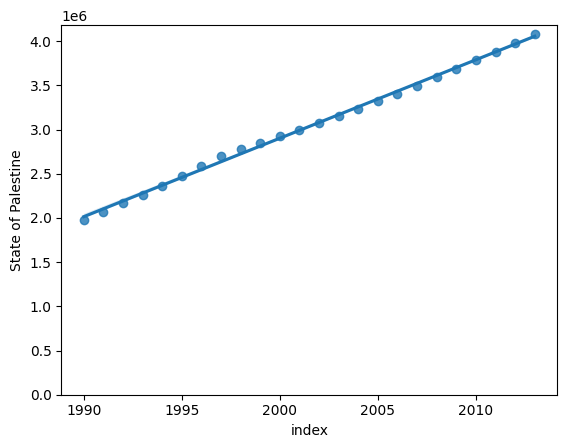

In [25]:
df_sop["index"] = df_sop["index"].astype(int)

df_sop.info()

sns.regplot(x='index' , y="State of Palestine", data=df_sop)
plt.ylim(0,)

In [30]:
# lets create linear regression
from sklearn.linear_model import LinearRegression

df_sop.columns = ['year','population']
df_sop

lm = LinearRegression()
lm

LinearRegression()

In [33]:
X = df_sop[['year']]
Y = df_sop['population']

lm.fit(X,Y)

LinearRegression()

In [34]:
Yhat=lm.predict(X)
Yhat[0:10] 

array([2014734.53999999, 2103485.51478261, 2192236.48956522,
       2280987.46434781, 2369738.43913043, 2458489.41391304,
       2547240.38869566, 2635991.36347824, 2724742.33826086,
       2813493.31304348])

In [35]:
lm.intercept_

-174599705.2773913

In [36]:
lm.coef_

array([88750.97478261])

In [37]:
# so the equition to find the population for perticular year is :
# population(Y) = -174799705 + (88751)* Year(X)

# lets check the palestine column in df_world
df_world[pd.isnull(df_world).any(axis=1)]



,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
State of Palestine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3236626.0,3320396.0,3406334.0,3494496.0,3591977.0,3689099.0,3786161.0,3882986.0,3979998.0,4076708.0


In [44]:
df_world.loc["State of Palestine"]

1980          NaN
1981          NaN
1982          NaN
1983          NaN
1984          NaN
1985          NaN
1986          NaN
1987          NaN
1988          NaN
1989          NaN
1990    1978248.0
1991    2068845.0
1992    2163591.0
1993    2262676.0
1994    2366298.0
1995    2474666.0
1996    2587997.0
1997    2706518.0
1998    2776568.0
1999    2848431.0
2000    2922153.0
2001    2997784.0
2002    3075373.0
2003    3154969.0
2004    3236626.0
2005    3320396.0
2006    3406334.0
2007    3494496.0
2008    3591977.0
2009    3689099.0
2010    3786161.0
2011    3882986.0
2012    3979998.0
2013    4076708.0
Name: State of Palestine, dtype: float64

In [45]:
# lets do the for loop to get the population calulated and entered in to world df
df_world.loc["State of Palestine", str(1984)]

for i in range(1980,1990):
    df_world.loc["State of Palestine", str(i)] = -174799705 + (88751* i)


In [46]:
df_world.loc["State of Palestine"]

1980     927275.0
1981    1016026.0
1982    1104777.0
1983    1193528.0
1984    1282279.0
1985    1371030.0
1986    1459781.0
1987    1548532.0
1988    1637283.0
1989    1726034.0
1990    1978248.0
1991    2068845.0
1992    2163591.0
1993    2262676.0
1994    2366298.0
1995    2474666.0
1996    2587997.0
1997    2706518.0
1998    2776568.0
1999    2848431.0
2000    2922153.0
2001    2997784.0
2002    3075373.0
2003    3154969.0
2004    3236626.0
2005    3320396.0
2006    3406334.0
2007    3494496.0
2008    3591977.0
2009    3689099.0
2010    3786161.0
2011    3882986.0
2012    3979998.0
2013    4076708.0
Name: State of Palestine, dtype: float64

In [47]:
# lets check the null values again

df_world.isnull().sum()

1980    0
1981    0
1982    0
1983    0
1984    0
1985    0
1986    0
1987    0
1988    0
1989    0
1990    0
1991    0
1992    0
1993    0
1994    0
1995    0
1996    0
1997    0
1998    0
1999    0
2000    0
2001    0
2002    0
2003    0
2004    0
2005    0
2006    0
2007    0
2008    0
2009    0
2010    0
2011    0
2012    0
2013    0
dtype: int64

In [69]:
# Now since we have both dataset ready, let make different database with percapita values for canada immigration

# create an Empty DataFrame object
df_can_pc = pd.DataFrame(index=df_world.index,columns=df_world.columns)

# print(df_can_pc)

# add all the index 


df_can_pc


,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Viet Nam,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Western Sahara,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Yemen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
lst = df_can_pc.index

lst

Index(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       ...
       'United States of America', 'Uruguay', 'Uzbekistan', 'Vanuatu',
       'Venezuela (Bolivarian Republic of)', 'Viet Nam', 'Western Sahara',
       'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', name='Country', length=195)

In [71]:
# can we use forloop to add all the numbers per capita

for i in range(1980, 2014):
    for country in lst:
        df_can_pc.loc[country,str(i)] = (df_can.loc[country,str(i)]/df_world.loc[country,str(i)])*1000000

In [72]:
df_can_pc

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,1.28137,3.496129,3.865869,4.72293,6.931099,32.343308,47.471192,71.783142,79.742205,100.813554,...,126.435288,140.755115,118.264616,102.380774,79.879824,63.756817,62.363266,75.31841,86.488498,63.535929
Albania,0.374252,0.0,0.0,0.0,0.0,0.0,0.330837,0.648592,0.636469,0.929384,...,479.031788,406.111665,286.043962,236.362283,190.003508,244.575697,192.583576,185.529715,213.763545,208.283536
Algeria,4.269085,3.462289,3.549983,3.336217,2.944816,1.98799,3.015398,5.596516,9.982256,17.437067,...,111.226678,110.023185,143.771153,106.609535,115.853262,153.227478,132.528849,118.351968,101.286714,113.971807
American Samoa,0.0,29.360815,0.0,0.0,0.0,0.0,0.0,23.341581,0.0,21.603871,...,0.0,0.0,17.594173,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Andorra,0.0,0.0,0.0,0.0,0.0,0.0,43.85484,0.0,0.0,0.0,...,0.0,0.0,12.465564,12.792959,0.0,0.0,0.0,0.0,14.081929,14.012078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Viet Nam,22.48516,33.695408,38.862418,59.707311,129.830633,98.760581,44.77214,22.449023,22.03396,45.886161,...,22.062604,22.275118,37.557265,30.367285,20.841793,25.103222,22.21688,19.502176,19.383811,23.397063
Western Sahara,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.001269,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Yemen,0.108637,0.209883,0.101294,0.586087,0.0,1.63089,0.61053,1.007086,0.565098,1.398345,...,5.980686,7.551357,6.3734,5.388327,5.701058,5.326766,8.527338,6.280517,6.635297,8.041802


<Axes: >

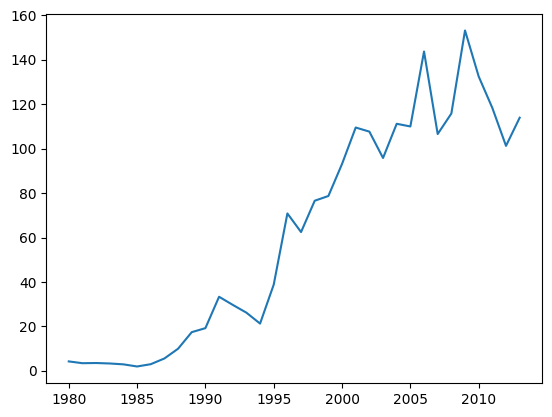

In [84]:
india = df_can_pc.loc["Algeria",years]
india.plot()